In [1]:
import os, sys
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
sys.path.append('.')
from ddpm.data.mnist import MNIST
from ddpm.models.utils import get_mlpnet, get_unet
from ddpm.train import train
from ddpm.diffusion import Diffusion

# Config

In [3]:
learning_rate = 1e-3
batch_size = 128
num_iterations = 10**4
N =30
device='cuda'

# Init Objects

In [4]:
diffusion = Diffusion(N=30).to(device)
model  = get_unet(28,1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [5]:

ds = MNIST(load=('MNIST' in os.listdir('./datasets')), num_channels=1, device = device)
ds.data = ds.data.to(device)
dataloader = DataLoader(ds, batch_size=batch_size, drop_last=True)

# Train

In [6]:
train(model, diffusion, optimizer, dataloader, num_iterations=num_iterations, device=device)

100%|██████████| 10000/10000 [11:26<00:00, 14.58it/s]


# Plot

In [7]:
x_T = torch.randn((16,1,28,28), device=device)
x_0, x_mean = diffusion.reverse_sample(x_T, model)
plot_x = x_mean.cpu().detach().numpy()

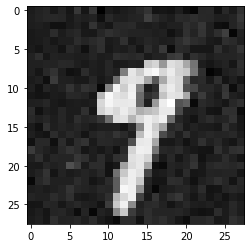

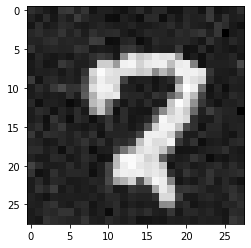

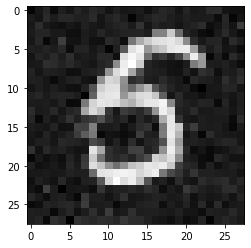

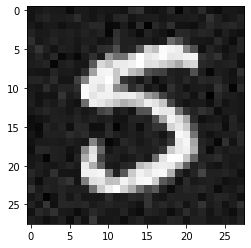

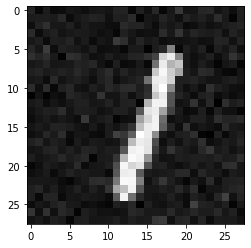

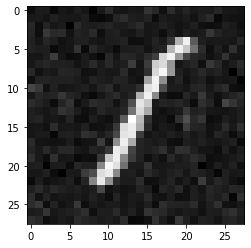

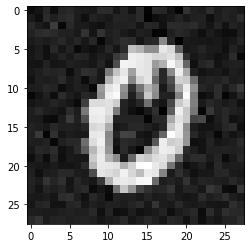

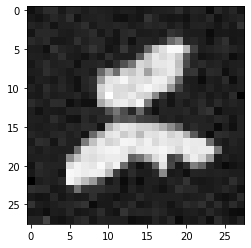

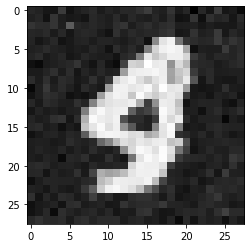

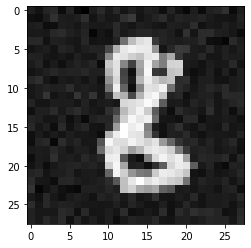

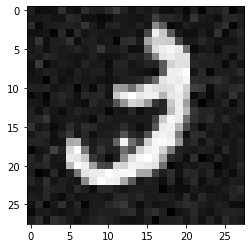

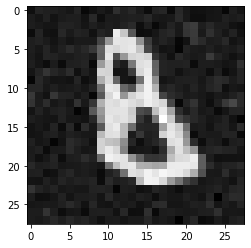

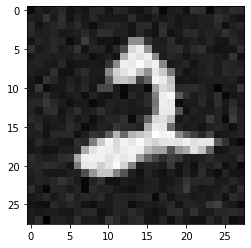

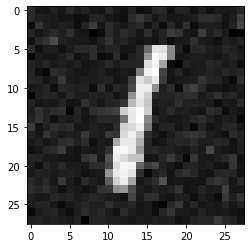

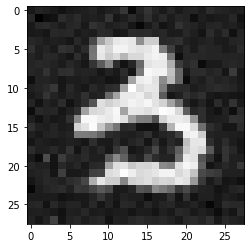

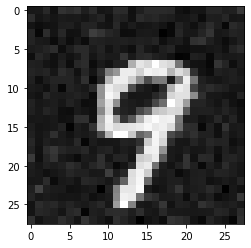

In [8]:
for i in range(16):
    x = plot_x[i].reshape(28,28)
    plt.imshow(x, 'gray')
    plt.show()